In [9]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

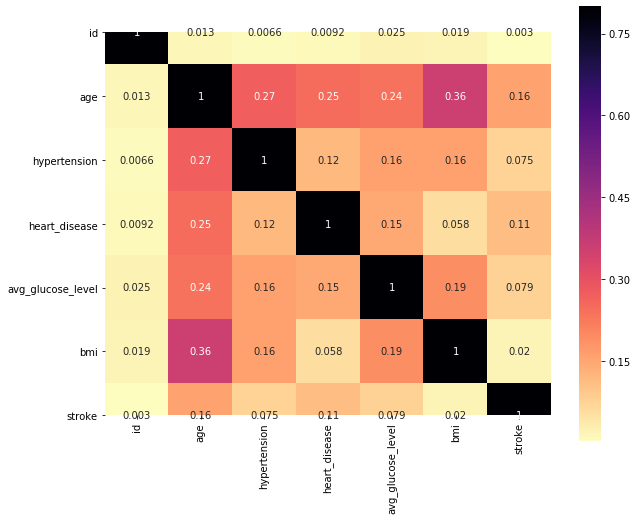

In [10]:
data = pd.read_csv(r"C:\Users\gouth\Desktop\Coursework\INFSCI 2725 DA\Project\train_2v.csv")
colormap = plt.cm.cubehelix_r
corrmatrix = data.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix, vmax=0.8, square=True, cmap = 'magma_r',annot=True)

C:\Users\gouth\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



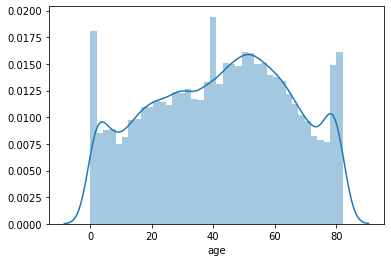

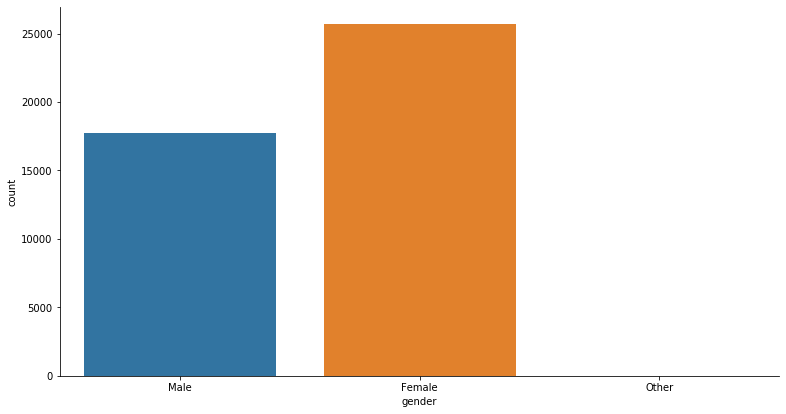

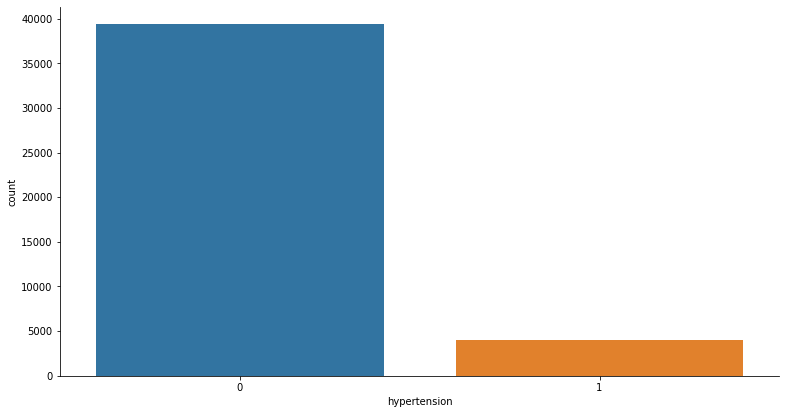

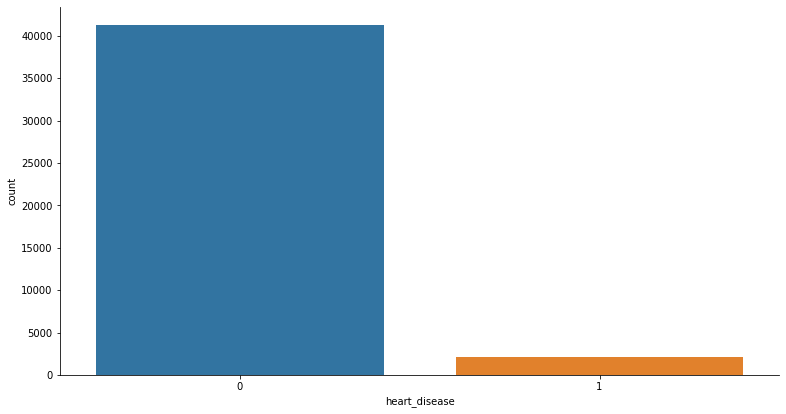

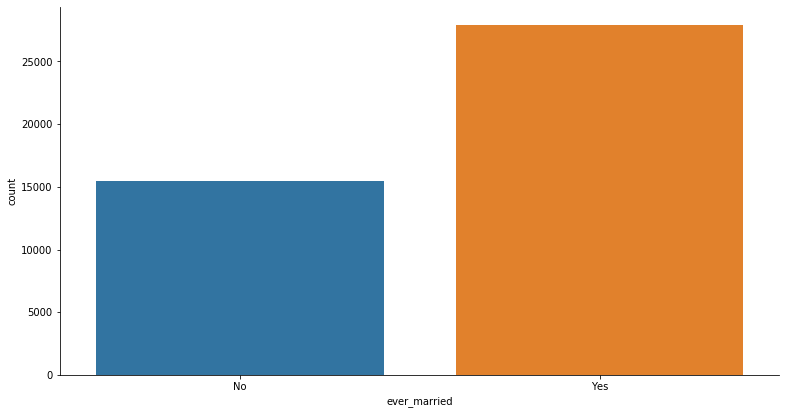

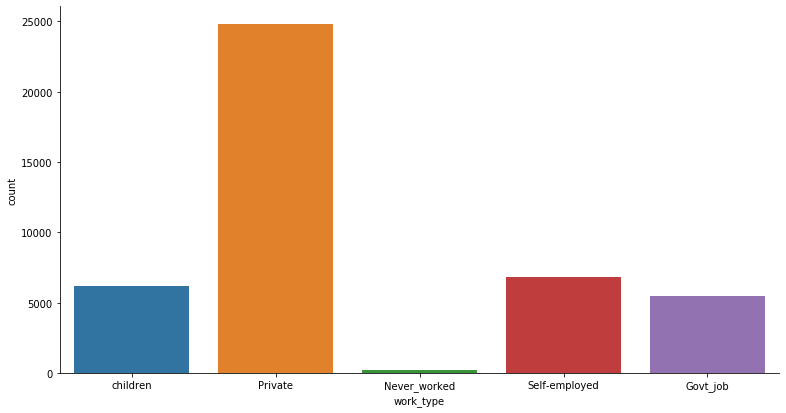

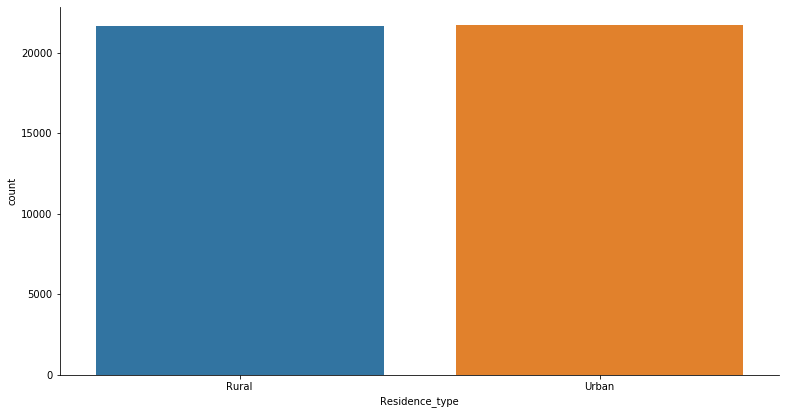

In [11]:
sns.distplot(data.age)
sns.factorplot(x='gender', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='hypertension', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='heart_disease', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)

sns.factorplot(x='ever_married', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='work_type', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)
sns.factorplot(x='Residence_type', kind='count' ,data=data)
fig = plt.gcf()
fig.set_size_inches(12, 6)


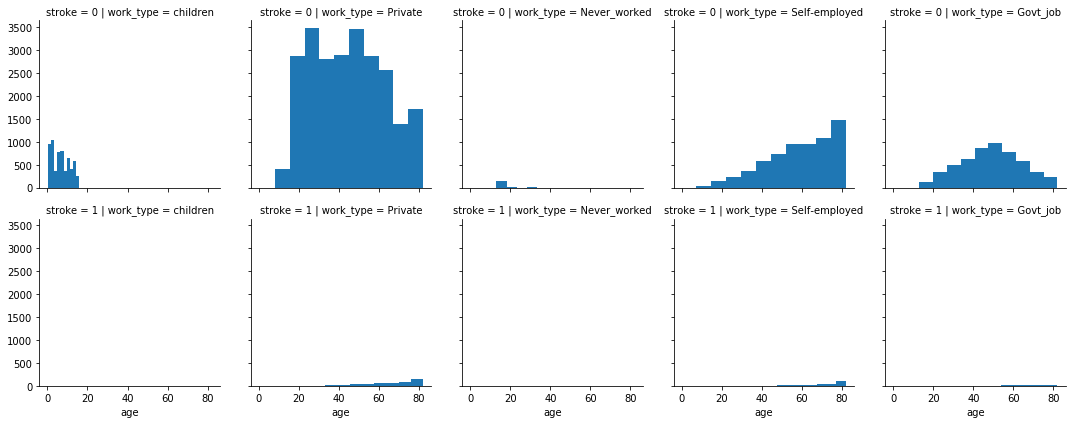

In [12]:
 g = sns.FacetGrid(data, col="work_type",  row="stroke")
 g.map(plt.hist,"age")

C:\Users\gouth\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



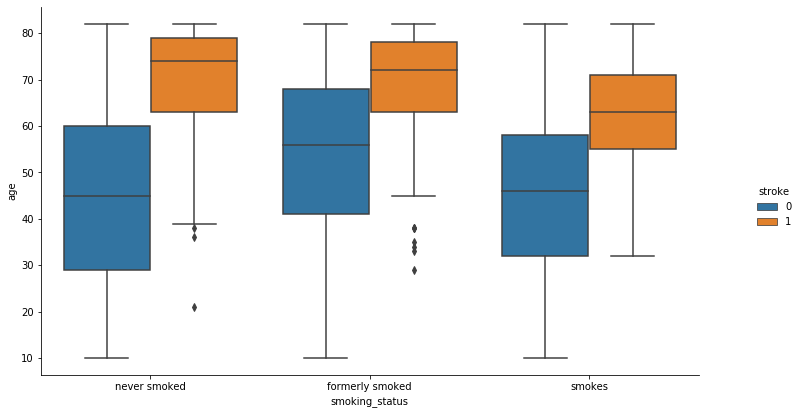

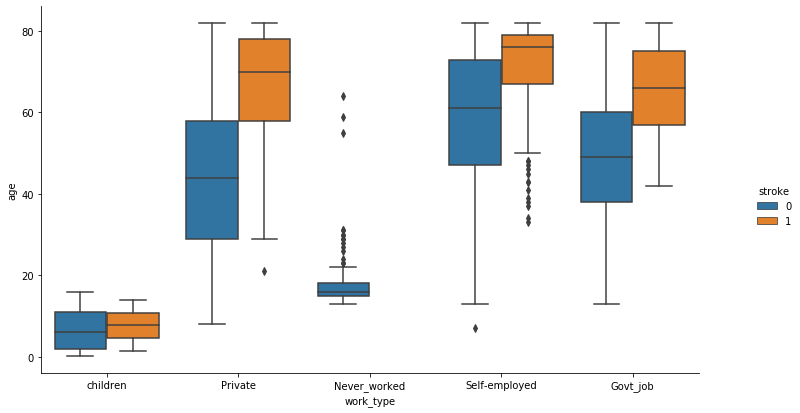

In [13]:
g = sns.factorplot(x="smoking_status", y="age",
                 hue="stroke",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)

g = sns.factorplot(x="work_type", y="age",
                 hue="stroke",
                 data=data, kind="box");
fig = plt.gcf()
fig.set_size_inches(12, 6)
                

In [14]:
data.bmi.fillna(data.bmi.mean(),inplace=True)
data.bmi.mean()
data_No_smoking_status = data[data.smoking_status.isnull()]
data_smoking_status = data.dropna(subset = ['smoking_status'])
data_No_smoking_status = data_No_smoking_status.drop(columns=['smoking_status'])
(data_No_smoking_status.stroke == 1).sum()

145

In [15]:
data_smoking_status.gender.head()

1      Male
3    Female
6    Female
7    Female
8    Female
Name: gender, dtype: object

In [16]:
data_No_smoking_status['gender'] = data_No_smoking_status['gender'].astype('category').cat.codes

data_No_smoking_status['ever_married'] = data_No_smoking_status['ever_married'].astype('category').cat.codes

data_No_smoking_status['work_type'] = data_No_smoking_status['work_type'].astype('category').cat.codes

data_No_smoking_status['Residence_type'] = data_No_smoking_status['Residence_type'].astype('category').cat.codes

In [17]:
data_smoking_status['gender'] = data_smoking_status['gender'].astype('category').cat.codes

data_smoking_status['ever_married'] = data_smoking_status['ever_married'].astype('category').cat.codes

data_smoking_status['work_type'] = data_smoking_status['work_type'].astype('category').cat.codes

data_smoking_status['Residence_type'] = data_smoking_status['Residence_type'].astype('category').cat.codes

data_smoking_status['smoking_status'] = data_smoking_status['smoking_status'].astype('category').cat.codes

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [18]:
labels = data_No_smoking_status.columns[1:-1]

X = data_No_smoking_status[labels]
y = data_No_smoking_status['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()


In [19]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.40%


Confusion matrix:
 [[2643    0]
 [  16    0]]


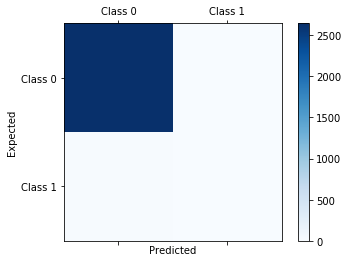

In [21]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [22]:
labels = data_smoking_status.columns[1:-1]

X = data_smoking_status[labels]
y = data_smoking_status['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()

In [23]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy: 97.84%
Confusion matrix:
 [[5892    0]
 [ 130    0]]


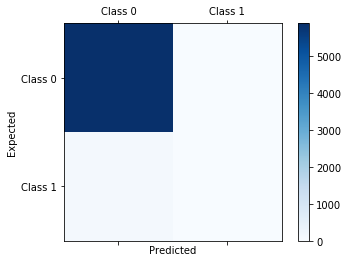

In [24]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [25]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [26]:
X_sm = pd.DataFrame(X_sm)

In [27]:
y_sm = pd.DataFrame(y_sm)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.5, random_state=1)

model = XGBClassifier()

C:\Users\gouth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\gouth\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 97.75%
Confusion matrix:
 [[14858     3]
 [  661 13948]]


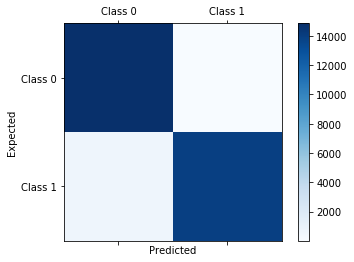

In [29]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()